In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats

plt.rcParams.update({'font.size': 12})

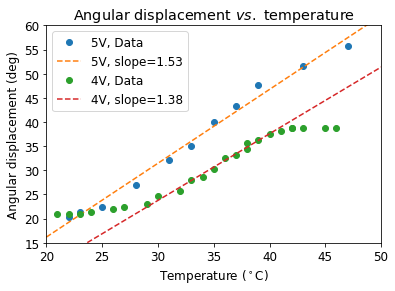

In [63]:
baseh = 90.0 # mm
radius = 115.0

def h2theta(x):
    return (180/math.pi) * math.asin((x-baseh) / radius)

def v2temp(x):
    return (x-0.5) / 0.01

temp = []
theta = []

with open('t-theta-5v.tsv', 'r') as f:
    while True:
        try:
            v, h = map(float, f.readline().split('\t'))
            temp.append(v2temp(v))
            theta.append(h2theta(h))
        except:
            break
        pass
    pass

# temp = temp[1:-1]
# theta = theta[1:-1]


slope, intercept, r_value, p_value, std_err = stats.linregress(temp, theta)

x = np.linspace(20, 50, 10)
y = slope*x + intercept

plt.xlim(20, 50)
plt.ylim(15, 60)
plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Angle from horizontal line (deg)')
plt.plot(temp, theta, 'o', label='5V, Data')
plt.plot(x, y, '--', label='5V, slope=%.2f' % slope)
plt.legend(loc=0)

temp = []
theta = []

with open('t-theta-4v.tsv', 'r') as f:
    while True:
        try:
            v, h = map(float, f.readline().split('\t'))
            temp.append(v2temp(v))
            theta.append(h2theta(h))
        except:
            break
        pass
    pass

plt.plot(temp, theta, 'o', label='4V, Data')
temp = temp[7:-7]
theta = theta[7:-7]

slope, intercept, r_value, p_value, std_err = stats.linregress(temp, theta)

x = np.linspace(20, 50, 10)
y = slope*x + intercept

plt.xlim(20, 50)
plt.ylim(15, 60)
plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Angular displacement (deg)')
plt.plot(x, y, '--', label='4V, slope=%.2f' % slope)
plt.legend(loc=0)
plt.title('Angular displacement $\it vs.$ temperature')

plt.savefig('t-theta.pdf')

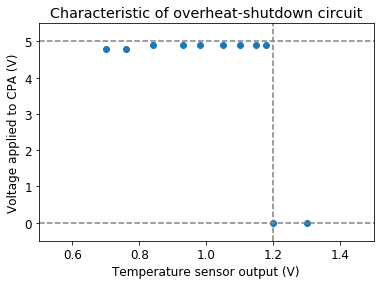

In [61]:
temp = []
volt = []

with open('overheat.tsv', 'r') as f:
    while True:
        try:
            t, v = map(float, f.readline().split('\t'))
            temp.append(t)
            volt.append(v)
        except:
            break
        pass
    pass

plt.title('Characteristic of overheat-shutdown circuit')
plt.xlim(0.5, 1.5)
plt.ylim(-0.5, 5.5)
plt.xlabel('Temperature sensor output (V)')
plt.ylabel('Voltage applied to CPA (V)')
plt.plot(temp, volt, 'o')
plt.axvline(x=1.2, color='gray', linestyle='--')
plt.axhline(y=5.0, color='gray', linestyle='--')
plt.axhline(y=0.0, color='gray', linestyle='--')

plt.savefig('overheat-shutdown.pdf')

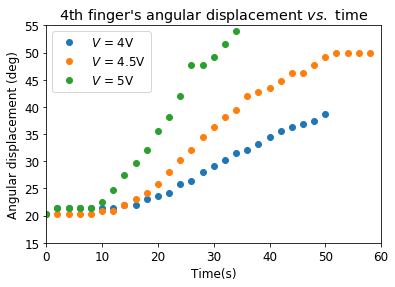

In [60]:

time = []
theta = []
with open('time-theta-4v.tsv', 'r') as f:
    while True:
        try:
            a, b = map(float, f.readline().split('\t'))
            time.append(a)
            theta.append(h2theta(b))
        except:
            break
        pass
    pass

plt.plot(time, theta, 'o', label='$V$ = 4V')

time = []
theta = []
with open('time-theta-4.5v.tsv', 'r') as f:
    while True:
        try:
            a, b = map(float, f.readline().split('\t'))
            time.append(a)
            theta.append(h2theta(b))
        except:
            break
        pass
    pass

plt.plot(time, theta, 'o', label='$V$ = 4.5V')

time = []
theta = []
with open('time-theta-5v.tsv', 'r') as f:
    while True:
        try:
            a, b = map(float, f.readline().split('\t'))
            time.append(a)
            theta.append(h2theta(b))
        except:
            break
        pass
    pass

plt.plot(time, theta, 'o', label='$V$ = 5V')


plt.legend(loc=0)
plt.xlabel('Time(s)')
plt.xlim(0, 60)
plt.ylabel('Angular displacement (deg)')
plt.ylim(15, 55)

plt.title('4th finger\'s angular displacement $ \it vs.$ time')

plt.savefig('time-theta.pdf')